In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
con = sqlite3.connect('sakila.db')
df = pd.read_sql("SELECT * FROM film", con)
df

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2021-03-06 15:52:00
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,Deleted Scenes,2021-03-06 15:52:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,YOUNG LANGUAGE,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,None,6,0.99,183,9.99,G,"Trailers,Behind the Scenes",2021-03-06 15:52:08
996,997,YOUTH KICK,A Touching Drama of a Teacher And a Cat who mu...,2006,1,None,4,0.99,179,14.99,NC-17,"Trailers,Behind the Scenes",2021-03-06 15:52:08
997,998,ZHIVAGO CORE,A Fateful Yarn of a Composer And a Man who mus...,2006,1,None,6,0.99,105,10.99,NC-17,Deleted Scenes,2021-03-06 15:52:08
998,999,ZOOLANDER FICTION,A Fateful Reflection of a Waitress And a Boat ...,2006,1,None,5,2.99,101,28.99,R,"Trailers,Deleted Scenes",2021-03-06 15:52:08


In [3]:
df = df.drop(columns = ['film_id', 'description', 'release_year', 'language_id', 'original_language_id', 'special_features', 'last_update'])
df = df.drop_duplicates()
df = df.dropna()
df

,title,rental_duration,rental_rate,length,replacement_cost,rating
0,ACADEMY DINOSAUR,6,0.99,86,20.99,PG
1,ACE GOLDFINGER,3,4.99,48,12.99,G
2,ADAPTATION HOLES,7,2.99,50,18.99,NC-17
3,AFFAIR PREJUDICE,5,2.99,117,26.99,G
4,AFRICAN EGG,6,2.99,130,22.99,G
...,...,...,...,...,...,...
995,YOUNG LANGUAGE,6,0.99,183,9.99,G
996,YOUTH KICK,4,0.99,179,14.99,NC-17
997,ZHIVAGO CORE,6,0.99,105,10.99,NC-17
998,ZOOLANDER FICTION,5,2.99,101,28.99,R


In [4]:
df = df.rename({'title' : 'Title', 'rental_duration' : 'Rent Count',
                'rental_rate' : 'Rent Rate', 'length' : 'Time', 'replacement_cost' : 'Rent Cost',
                'rating' : 'Rating'}, axis = 1)
df

,Title,Rent Count,Rent Rate,Time,Rent Cost,Rating
0,ACADEMY DINOSAUR,6,0.99,86,20.99,PG
1,ACE GOLDFINGER,3,4.99,48,12.99,G
2,ADAPTATION HOLES,7,2.99,50,18.99,NC-17
3,AFFAIR PREJUDICE,5,2.99,117,26.99,G
4,AFRICAN EGG,6,2.99,130,22.99,G
...,...,...,...,...,...,...
995,YOUNG LANGUAGE,6,0.99,183,9.99,G
996,YOUTH KICK,4,0.99,179,14.99,NC-17
997,ZHIVAGO CORE,6,0.99,105,10.99,NC-17
998,ZOOLANDER FICTION,5,2.99,101,28.99,R


C:\Users\sakhtafzar\AppData\Local\Temp\ipykernel_5664\3394656722.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_rented['Title'],


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'TELEGRAPH VOYAGE'),
  Text(1, 0, 'VOICE PEACH'),
  Text(2, 0, 'DESIRE ALIEN'),
  Text(3, 0, 'EFFECT GLADIATOR'),
  Text(4, 0, 'FEATHERS METAL'),
  Text(5, 0, 'GILMORE BOILED'),
  Text(6, 0, 'STEPMOM DREAM'),
  Text(7, 0, 'ARABIA DOGMA'),
  Text(8, 0, 'ZORRO ARK'),
  Text(9, 0, 'CHILL LUCK')])

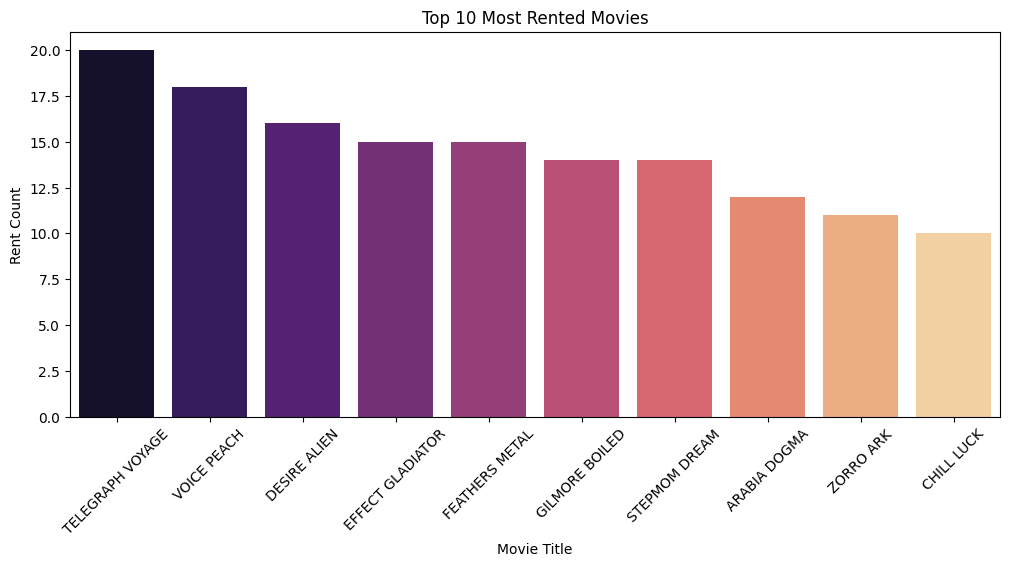

In [5]:
top_rented = df.nlargest(10, 'Rent Count')

plt.figure(figsize = (12, 5))
sns.barplot(x = top_rented['Title'],
            y = top_rented['Rent Count'],
            palette = 'magma')
plt.title('Top 10 Most Rented Movies')
plt.xlabel('Movie Title')
plt.ylabel('Rent Count')
plt.xticks(rotation = 45)

Text(0.5, 1.0, 'Movie Rating Distribution')

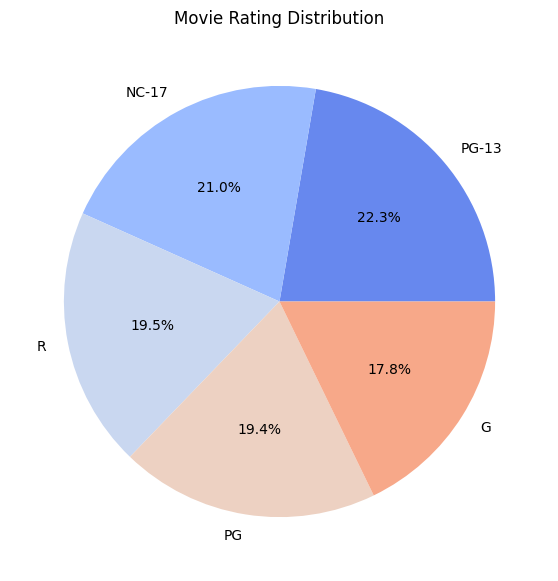

In [6]:
rating_counts = df['Rating'].value_counts()

plt.figure(figsize = (7, 7))
plt.pie(rating_counts,
        labels = rating_counts.index,
        autopct = '%1.1f%%',
        colors = sns.color_palette('coolwarm'))
plt.title('Movie Rating Distribution')

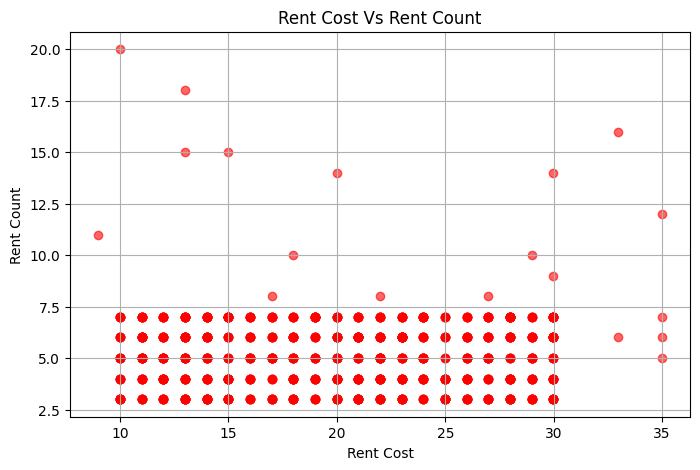

In [7]:
plt.figure(figsize = (8, 5))
plt.scatter(df['Rent Cost'], df['Rent Count'],
            alpha = 0.6, color = 'red')
plt.title('Rent Cost Vs Rent Count')
plt.xlabel('Rent Cost')
plt.ylabel('Rent Count')
plt.grid(True)

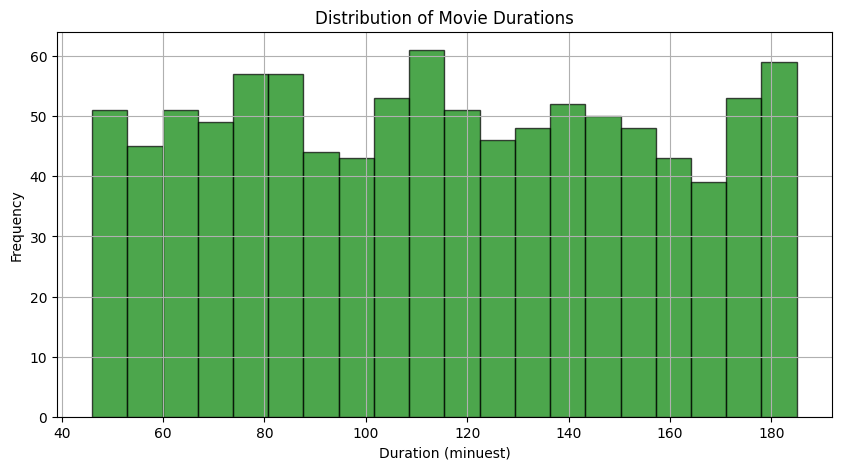

In [8]:
plt.figure(figsize = (10, 5))
plt.hist(df['Time'], bins = 20, color = 'green',
         edgecolor = 'black', alpha = 0.7)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minuest)')
plt.ylabel('Frequency')
plt.grid(True)

C:\Users\sakhtafzar\AppData\Local\Temp\ipykernel_5664\2901713607.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df['Rating'], y = df['Rent Cost'],


Text(0, 0.5, 'Rent Cost')

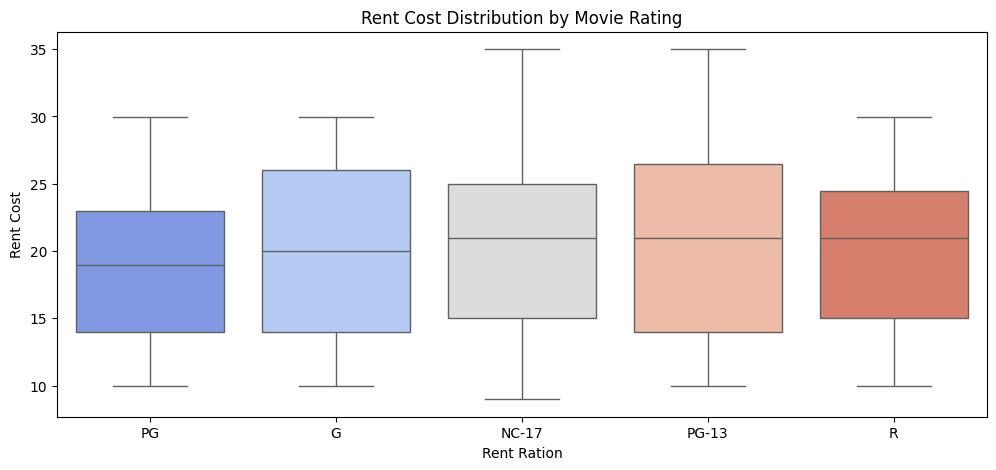

In [9]:
plt.figure(figsize = (12, 5))
sns.boxplot(x = df['Rating'], y = df['Rent Cost'],
            palette = 'coolwarm')
plt.title('Rent Cost Distribution by Movie Rating')
plt.xlabel('Rent Ration')
plt.ylabel('Rent Cost')

C:\Users\sakhtafzar\AppData\Local\Temp\ipykernel_5664\4293318872.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_expensive['Title'],


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'ARABIA DOGMA'),
  Text(1, 0, 'KWAI HOMEWARD'),
  Text(2, 0, 'LABYRINTH LEAGUE'),
  Text(3, 0, 'PHILADELPHIA WIFE'),
  Text(4, 0, 'CROOKED FROGMEN'),
  Text(5, 0, 'DESIRE ALIEN'),
  Text(6, 0, 'BALLROOM MOCKINGBIRD'),
  Text(7, 0, 'BLINDNESS GUN'),
  Text(8, 0, 'BONNIE HOLOCAUST'),
  Text(9, 0, 'CHARIOTS CONSPIRACY')])

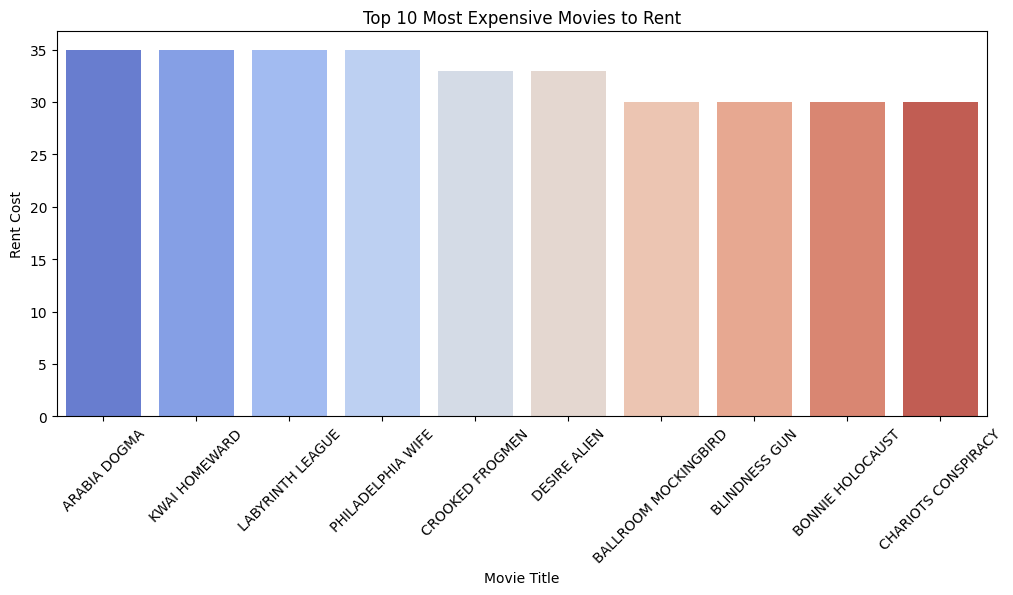

In [10]:
top_expensive = df.nlargest(10, 'Rent Cost')

plt.figure(figsize = (12, 5))
sns.barplot(x = top_expensive['Title'],
            y = top_expensive['Rent Cost'],
            palette = 'coolwarm')
plt.title('Top 10 Most Expensive Movies to Rent')
plt.xlabel('Movie Title')
plt.ylabel('Rent Cost')
plt.xticks(rotation = 45)